In [1]:
import segyio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = r"../../Data/2D_Scenarios/VSP_R52/R_52.sgy"
src = segyio.open(path, mode='r', endian='big', ignore_geometry=True)
samples = src.samples
data = segyio.tools.collect(src.trace[:])
sou_x = src.attributes(segyio.TraceField.SourceX)[:]
sou_z = src.attributes(segyio.TraceField.SourceSurfaceElevation)[:]
rec_x = src.attributes(segyio.TraceField.GroupX)[:]
rec_z = src.attributes(segyio.TraceField.ReceiverGroupElevation)[:]
src.close()
print(sou_x)
print(sou_z)
print(rec_x)
print(rec_z)

[1100 1100 1100 ... 6900 6900 6900]
[0 0 0 ... 0 0 0]
[4000 4000 4000 ... 4000 4000 4000]
[1000 1010 1020 ... 2230 2240 2250]


In [4]:
nrec = np.unique(rec_z).size
nsou = np.unique(sou_x).size

idx = sou_x == np.unique(sou_x)[10]
csg_ensemble = data[idx, :]
csg_rec_z = rec_z[idx]

In [10]:
samples

array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 3.0000e+03, 3.0005e+03,
       3.0010e+03])

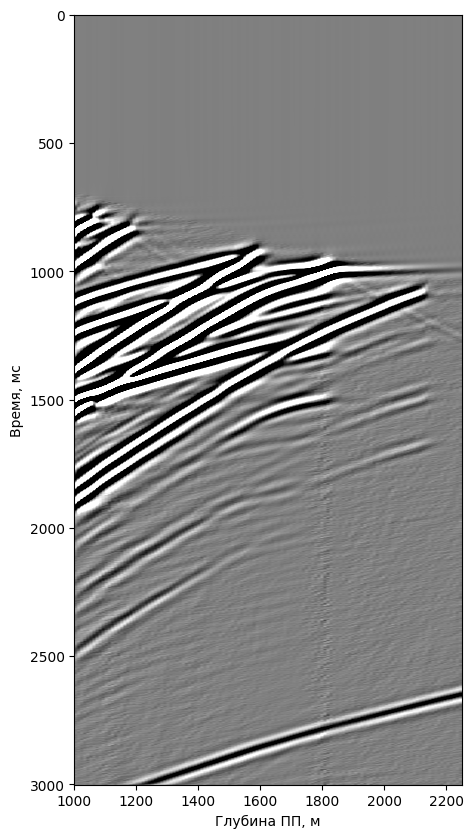

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(5, 10))
plt.imshow(csg_ensemble.T, vmin=-np.quantile(csg_ensemble, 0.95), vmax=np.quantile(csg_ensemble, 0.95),
           extent = [csg_rec_z[0], csg_rec_z[-1], samples[-1], samples[0]],
           cmap='gray',
          )
axs.set_xlabel('Глубина ПП, м')
axs.set_ylabel('Время, мс')
axs.set_aspect('auto')
plt.show()